# Task 3 : Unsupervised Learning (Cluster Analysis)
## By Jagriti Sahi

In [75]:
#importing important libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [76]:
# importing libraries to get number pf clusters 
import scipy.cluster.hierarchy as shc

In [77]:
# Importing AgglomerativeClustering Libarary 
from sklearn.cluster import AgglomerativeClustering 

In [78]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\JAGRITI\IRIS.csv' , encoding = 'latin')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exporing the data

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [80]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [81]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


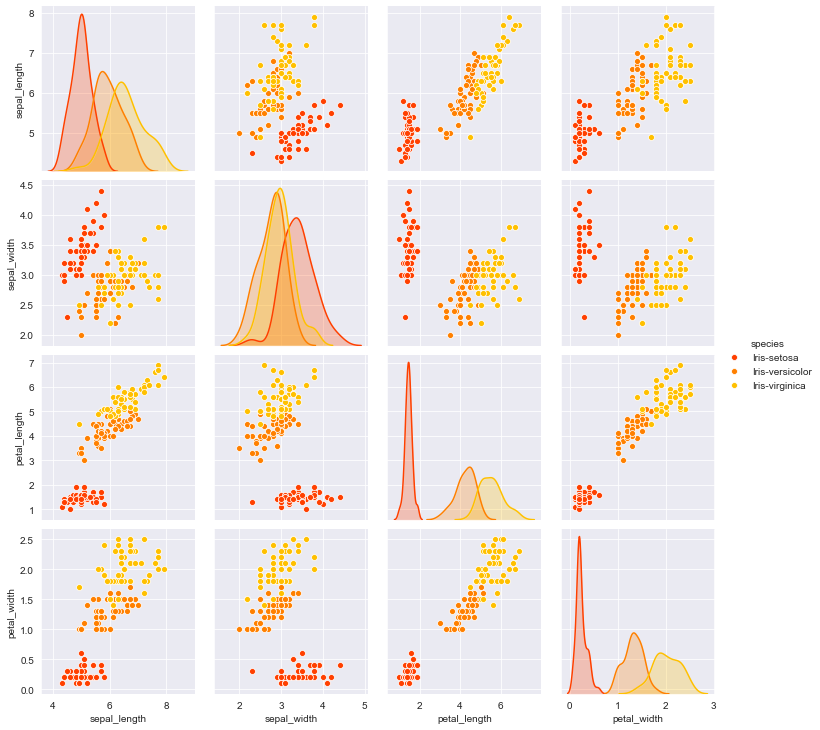

In [82]:
sns.set_style('darkgrid')

sns.pairplot(data ,hue = 'species', palette= 'autumn' );

In [83]:
corr = data.corr()

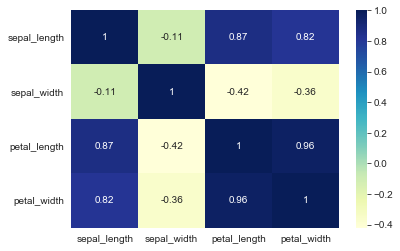

In [84]:
sns.heatmap(corr ,annot = True , cmap = 'YlGnBu' )

In [85]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [86]:
x = data.drop('species' , axis = 1).values

## Visualising dendogram to get optimum number of clusters 

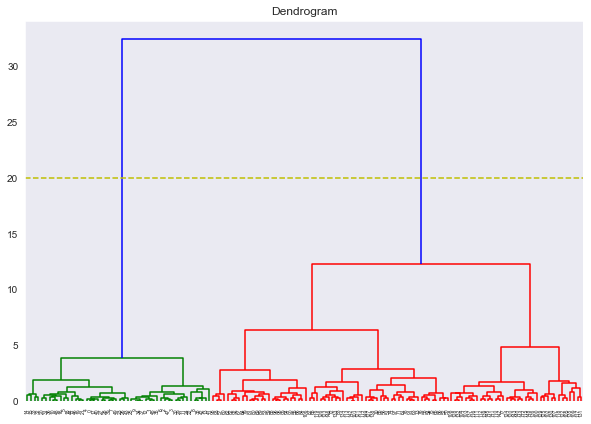

In [87]:
sns.set_style('dark')
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(x, method='ward' , optimal_ordering = True) , get_leaves = False)
plt.axhline(y=20, color='y', linestyle='--')

**Number of clusters depends upon the number of vertiical lines intersected by yellow line . Here , it is 2 . So we will have two clusters .**

## Hierarchial Clustering 
 Hierarchial Clustering is of two types :
 1. Agglomerative Hierarchial Clustering 
 2. Divisive Hierarchical Clustering
 
 Here, we will go with Agglomerative Hierarchial Clustering.

In [88]:
#Instantiating and fitting model
model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean' , linkage = 'ward')
model.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [89]:
labels = model.fit_predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Visualising clusters 

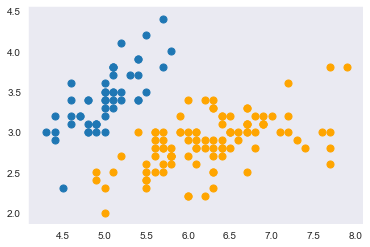

In [90]:
sns.set_style('dark')
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=50, marker='o', color = 'Orange')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=50, marker='o' , cmap = 'virdis')